# Human Face Recognition using PCA

## Data Exploration

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

figures_dir = "../figures"
os.makedirs(figures_dir, exist_ok=True)

### Load the dataset

In [2]:
print("Loading LFW dataset...")
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
images = lfw_dataset.images
X = lfw_dataset.data
n_samples, h, w = images.shape
target_names = lfw_dataset.target_names
n_classes = len(target_names)

print(f"Dataset loaded with {n_samples} samples.")
print(f"Image dimensions: {h}x{w}")
print(f"Number of classes: {n_classes}")
print("Classes:", target_names)

Loading LFW dataset...
Dataset loaded with 1288 samples.
Image dimensions: 50x37
Number of classes: 7
Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


**Dataset Overview**

- **Dataset Name:** Labeled Faces in the Wild (LFW)
- **Number of Samples:** 1,288 images
- **Image Dimensions:** 50x37 pixels (height x width)
- **Number of Classes:** 7 distinct individuals
- **Class Labels:**
  - Ariel Sharon
  - Colin Powell
  - Donald Rumsfeld
  - George W. Bush
  - Gerhard Schroeder
  - Hugo Chavez
  - Tony Blair

This dataset contains facial images with a minimum of 70 images per individual. The smaller image dimensions (50x37) and the limited number of classes make it suitable for tasks such as facial recognition, classification, and feature extraction experiments.

### Visualizing a few images from the dataset

Displaying sample images...


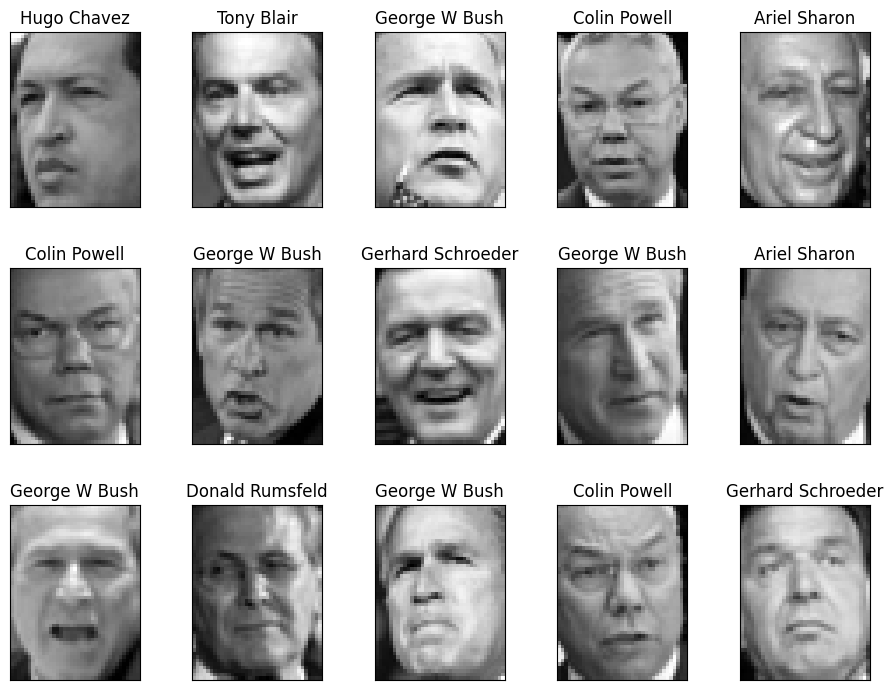

In [3]:
# Step 2: Visualize a few sample images
def plot_sample_images(images, target, target_names, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(target_names[target[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    save_path = os.path.join(figures_dir, "sample_images.png")
    plt.savefig(save_path)
    plt.show()

print("Displaying sample images...")
plot_sample_images(images, lfw_dataset.target, target_names, h, w)

### Analyzing the dataset

Analyzing pixel intensity distribution...


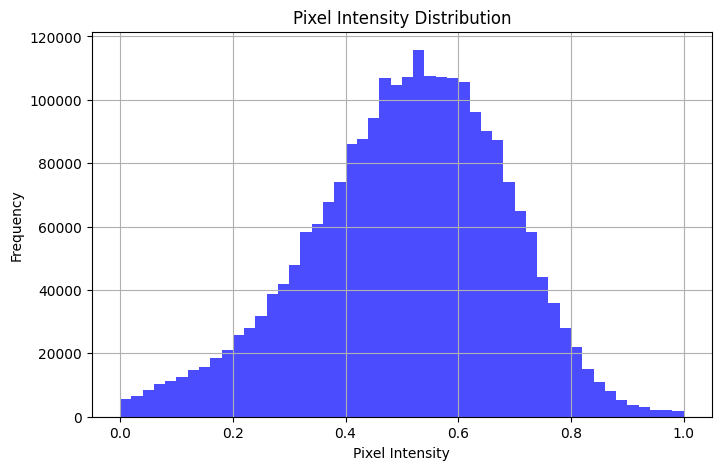

In [4]:
# Step 3: Analyze pixel intensity distribution
def plot_pixel_distribution(images):
    pixel_values = images.flatten()
    plt.figure(figsize=(8, 5))
    plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    save_path = os.path.join(figures_dir, "pixel_intensity.png")
    plt.savefig(save_path)
    plt.show()

print("Analyzing pixel intensity distribution...")
plot_pixel_distribution(images)

Analyzing class distribution...


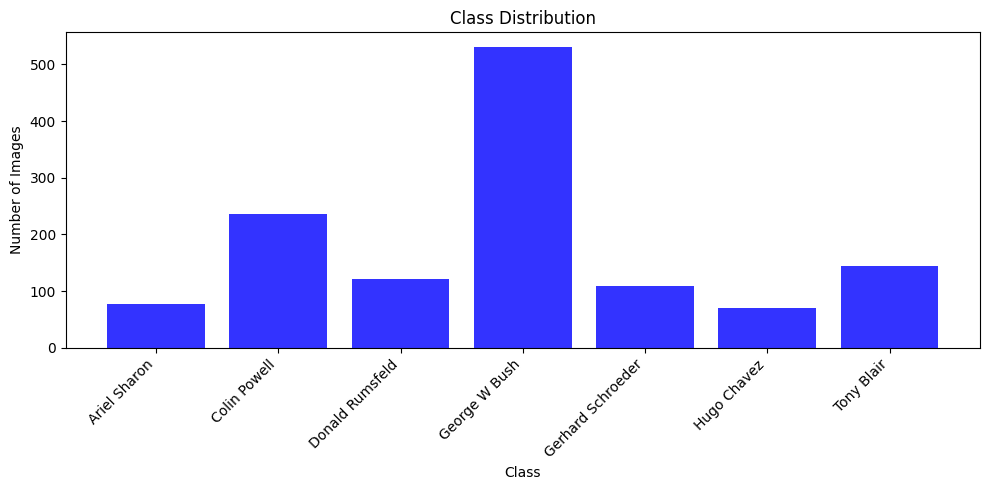

In [5]:
# Step 4: Class distribution
def plot_class_distribution(target, target_names):
    class_counts = np.bincount(target)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(target_names)), class_counts, color='blue', alpha=0.8)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(range(len(target_names)), target_names, rotation=45, ha="right")
    plt.tight_layout()
    save_path = os.path.join(figures_dir, "class_distribution.png")
    plt.savefig(save_path)
    plt.show()

print("Analyzing class distribution...")
plot_class_distribution(lfw_dataset.target, target_names)

In [6]:
# Step 5: Summary statistics for images
def compute_image_statistics(images):
    mean_image = np.mean(images, axis=0)
    std_image = np.std(images, axis=0)
    return mean_image, std_image

mean_image, std_image = compute_image_statistics(X)

Visualizing mean and standard deviation of images...


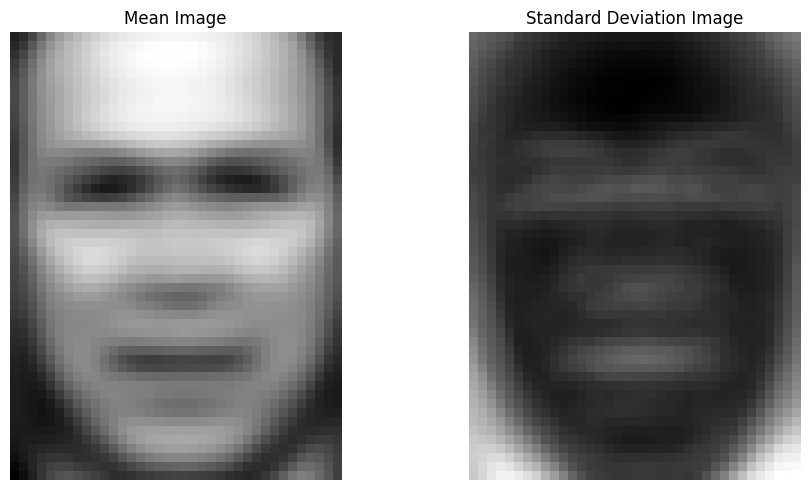

In [7]:
# Visualize mean and standard deviation images
def plot_image_statistics(mean_image, std_image, h, w):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mean_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Mean Image")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(std_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Standard Deviation Image")
    plt.axis("off")
    plt.tight_layout()
    save_path = os.path.join(figures_dir, "mean_sd.png")
    plt.savefig(save_path)
    plt.show()

print("Visualizing mean and standard deviation of images...")
plot_image_statistics(mean_image, std_image, h, w)

## PCA and Sparse PCA

### Standardizing the data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA Implementation

In [9]:
print("Performing PCA...")
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
pca_components = pca.components_

print(f"Shape of X_scaled: {X_scaled.shape}")  # Standardized features
print(f"Shape of X_pca: {X_pca.shape}")  # Reduced features

Performing PCA...
Shape of X_scaled: (1288, 1850)
Shape of X_pca: (1288, 171)


### Sparse PCA Implementation

In [10]:
# Define Sparse PCA with desired number of components
n_components = 171 
sparse_pca = SparsePCA(n_components=n_components, random_state=42, alpha=1)

# Fit and transform the data
X_sparse_pca = sparse_pca.fit_transform(X_scaled)
sparse_pca_components = sparse_pca.components_

# Print shapes
print(f"Shape of X_scaled: {X_scaled.shape}")  # Standardized features
print(f"Shape of X_sparse_pca: {X_sparse_pca.shape}")  # Reduced features

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 15 iterations, alpha=1.281e-03, previous alpha=1.281e-03, with an active set of 14 regressors.
  warnings.warn(


Shape of X_scaled: (1288, 1850)
Shape of X_sparse_pca: (1288, 171)


In [24]:
# Define Mini Batch Sparse PCA with desired number of components

mbsparse_pca = MiniBatchSparsePCA(n_components=n_components, alpha=0.1, batch_size=100, max_iter=50)

# Fit and transform the data
X_mbsparse_pca = mbsparse_pca.fit_transform(X_scaled)
mbsparse_pca_components = mbsparse_pca.components_

# Print shapes
print(f"Shape of X_scaled: {X_scaled.shape}")  # Standardized features
print(f"Shape of X_sparse_pca: {X_mbsparse_pca.shape}")  # Reduced features


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 152 iterations, alpha=1.316e-04, previous alpha=1.311e-04, with an active set of 107 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 134 iterations, alpha=1.345e-04, previous alpha=1.345e-04, with an active set of 119 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 149 iterations, alpha=1.086e-04, previous alpha=1.086e-

Shape of X_scaled: (1288, 1850)
Shape of X_sparse_pca: (1288, 171)


### Visualizing the top principal components

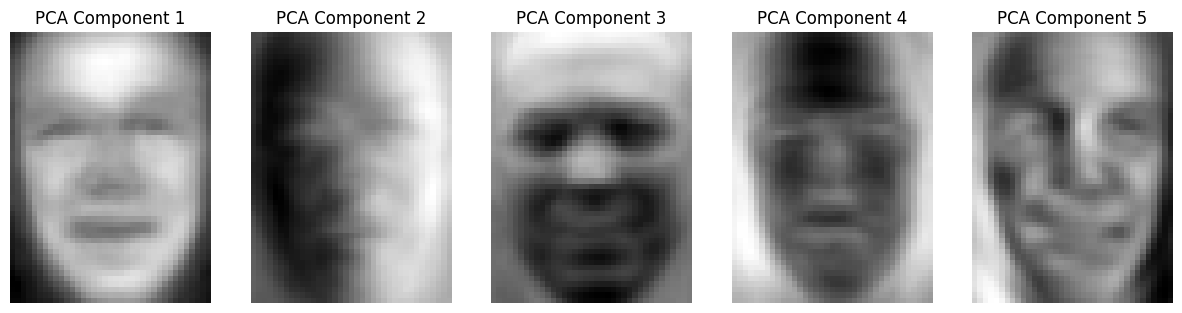

In [11]:
# Visualize the first few PCA components as images
n_visualize = 5  # Number of components to visualize
plt.figure(figsize=(15, 5))

for i in range(n_visualize):
    plt.subplot(1, n_visualize, i + 1)
    plt.imshow(pca_components[i].reshape(h, w), cmap='gray')
    plt.title(f"PCA Component {i+1}")
    plt.axis('off')

plt.show()

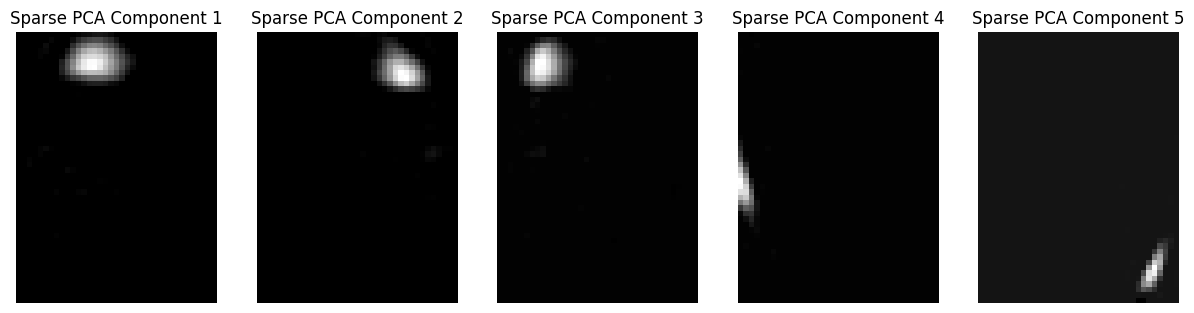

In [12]:
n_visualize = 5  # Number of components to visualize
plt.figure(figsize=(15, 5))

for i in range(n_visualize):
    plt.subplot(1, n_visualize, i + 1)
    plt.imshow(sparse_pca_components[i].reshape(h, w), cmap='gray')
    plt.title(f"Sparse PCA Component {i+1}")
    plt.axis('off')

plt.show()

In [ ]:
n_visualize = 5  # Number of components to visualize
plt.figure(figsize=(15, 5))

for i in range(n_visualize):
    plt.subplot(1, n_visualize, i + 1)
    plt.imshow(mbsparse_pca_components[i].reshape(h, w), cmap='gray')
    plt.title(f"Sparse PCA Component {i+1}")
    plt.axis('off')

plt.show()

### 2D Visualization of the dataset

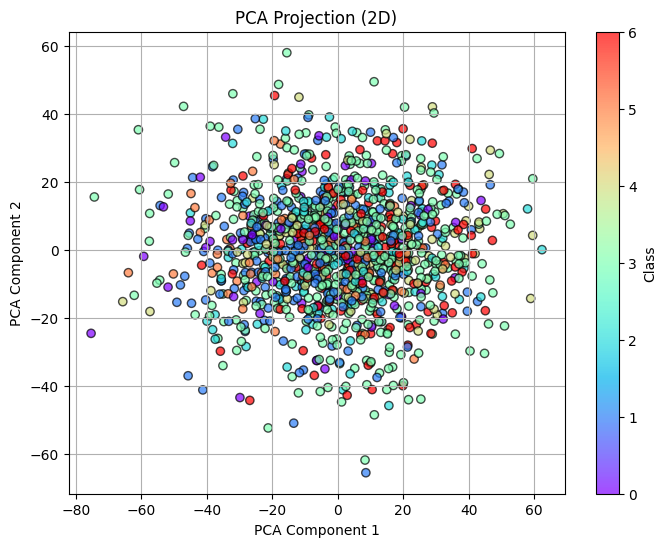

In [13]:
# 2D PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lfw_dataset.target, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.colorbar(ticks=range(len(target_names)), label="Class")
plt.title("PCA Projection (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

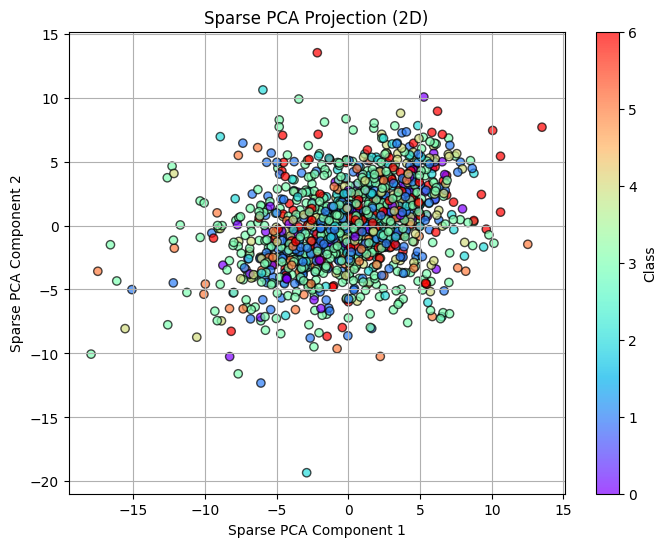

In [14]:
# 2D Sparse PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 1], c=lfw_dataset.target, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.colorbar(ticks=range(len(target_names)), label="Class")
plt.title("Sparse PCA Projection (2D)")
plt.xlabel("Sparse PCA Component 1")
plt.ylabel("Sparse PCA Component 2")
plt.grid()
plt.show()

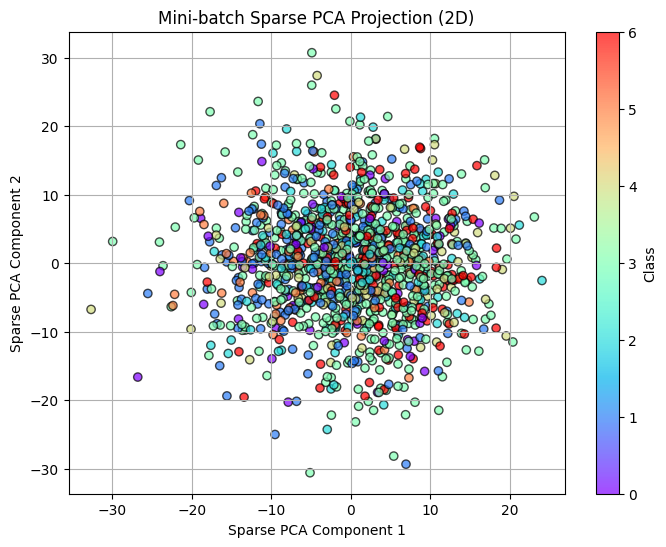

In [25]:
# 2D Sparse PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_mbsparse_pca[:, 0], X_mbsparse_pca[:, 1], c=lfw_dataset.target, cmap='rainbow', alpha=0.7, edgecolor='k')
plt.colorbar(ticks=range(len(target_names)), label="Class")
plt.title("Mini-batch Sparse PCA Projection (2D)")
plt.xlabel("Sparse PCA Component 1")
plt.ylabel("Sparse PCA Component 2")
plt.grid()
plt.show()

### 3D Visualization of the dataset

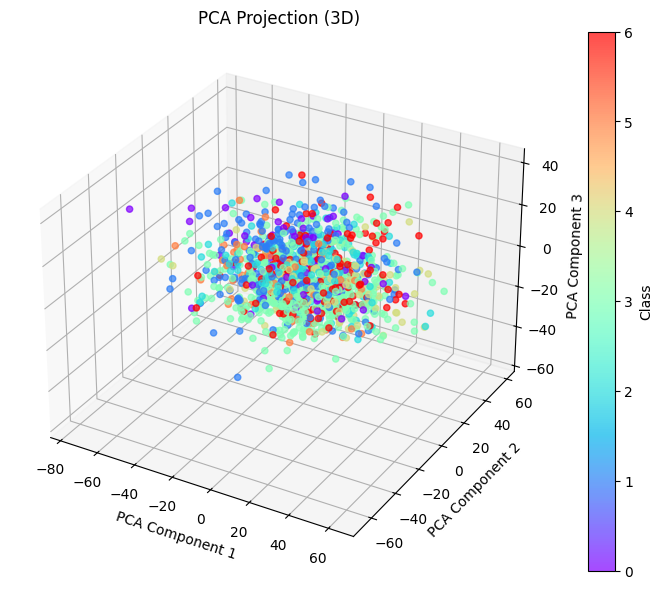

In [15]:
# 3D PCA visualization (if n_components >= 3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lfw_dataset.target, cmap='rainbow', alpha=0.7)
plt.colorbar(scatter, label="Class")
ax.set_title("PCA Projection (3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.show()

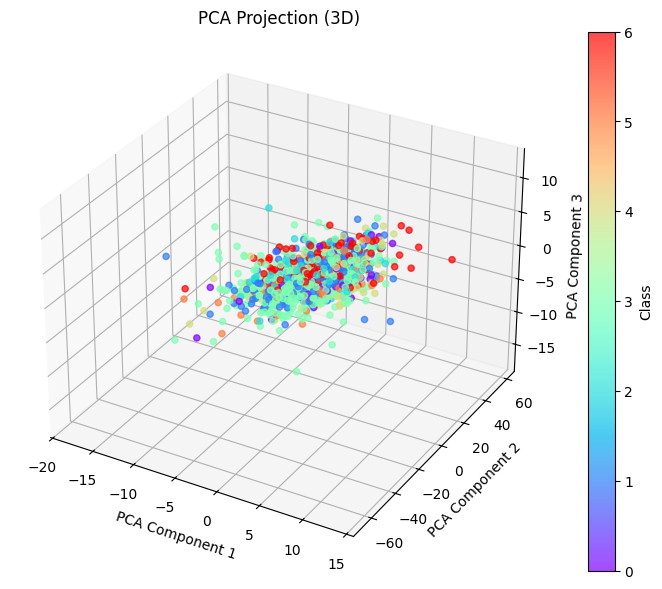

In [ ]:
# 3D Sparse PCA visualization (if n_components >= 3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_sparse_pca[:, 0], X_pca[:, 1], X_sparse_pca[:, 2], c=lfw_dataset.target, cmap='rainbow', alpha=0.7)
plt.colorbar(scatter, label="Class")
ax.set_title("SPCA Projection (3D)")
ax.set_xlabel("SPCA Component 1")
ax.set_ylabel("SPCA Component 2")
ax.set_zlabel("SPCA Component 3")
plt.show()

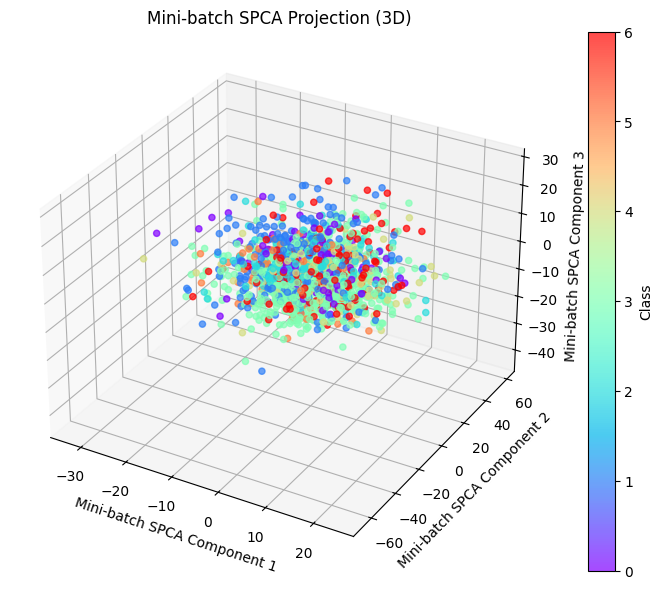

In [26]:
# 3D Sparse PCA visualization (if n_components >= 3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_mbsparse_pca[:, 0], X_pca[:, 1], X_mbsparse_pca[:, 2], c=lfw_dataset.target, cmap='rainbow', alpha=0.7)
plt.colorbar(scatter, label="Class")
ax.set_title("Mini-batch SPCA Projection (3D)")
ax.set_xlabel("Mini-batch SPCA Component 1")
ax.set_ylabel("Mini-batch SPCA Component 2")
ax.set_zlabel("Mini-batch SPCA Component 3")
plt.show()

## Support Vector Machine

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Create a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, lfw_dataset.target, test_size=0.2, random_state=42, shuffle=True, stratify=None
)

In [38]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_sparse_pca = sparse_pca.fit_transform(X_train)
X_test_sparse_pca = sparse_pca.transform(X_test)

X_train_mbsparse_pca = mbsparse_pca.fit_transform(X_train)
X_test_mbsparse_pca = mbsparse_pca.transform(X_test)


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 135 iterations, alpha=1.001e-04, previous alpha=1.001e-04, with an active set of 106 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 86 iterations, alpha=3.988e-04, previous alpha=3.988e-04, with an active set of 67 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=8.592e-04, previous alpha=8.592e-04,

Accuracy on original data: 0.8566


In [40]:
# We import a Support Vector Classifier (SVC) from sklearn
svm = SVC(kernel='linear')

# Fit the model on the training data
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on original data: {acc:.4f}')

Accuracy on original data: 0.8566


In [43]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on original data: {acc:.4f}')
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 
     

Accuracy on original data: 0.8178
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.73      0.62        11
     Colin Powell       0.79      0.87      0.83        47
  Donald Rumsfeld       0.68      0.77      0.72        22
    George W Bush       0.91      0.86      0.88       119
Gerhard Schroeder       0.70      0.74      0.72        19
      Hugo Chavez       0.89      0.62      0.73        13
       Tony Blair       0.84      0.78      0.81        27

         accuracy                           0.82       258
        macro avg       0.76      0.77      0.76       258
     weighted avg       0.83      0.82      0.82       258

Confusion Matrix is:
[[  8   0   3   0   0   0   0]
 [  3  41   0   3   0   0   0]
 [  3   0  17   1   1   0   0]
 [  1   6   5 102   2   0   3]
 [  0   1   0   3  14   1   0]
 [  0   2   0   1   1   8   1]
 [  0   2   0   2   2   0  21]]


In [41]:
svm.fit(X_train_sparse_pca, y_train)
y_pred = svm.predict(X_test_sparse_pca)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on original data: {acc:.4f}')
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 
     

Accuracy on original data: 0.8256
                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.64      0.67        11
     Colin Powell       0.75      0.89      0.82        47
  Donald Rumsfeld       0.70      0.73      0.71        22
    George W Bush       0.93      0.88      0.91       119
Gerhard Schroeder       0.70      0.84      0.76        19
      Hugo Chavez       1.00      0.62      0.76        13
       Tony Blair       0.76      0.70      0.73        27

         accuracy                           0.83       258
        macro avg       0.79      0.76      0.76       258
     weighted avg       0.84      0.83      0.83       258

Confusion Matrix is:
[[  7   1   3   0   0   0   0]
 [  1  42   0   3   0   0   1]
 [  1   2  16   2   1   0   0]
 [  1   5   3 105   2   0   3]
 [  0   1   0   1  16   0   1]
 [  0   2   0   0   2   8   1]
 [  0   3   1   2   2   0  19]]


In [42]:
svm.fit(X_train_mbsparse_pca, y_train)
y_pred = svm.predict(X_test_mbsparse_pca)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy on original data: {acc:.4f}')
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 
     

Accuracy on original data: 0.8256
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.64      0.64        11
     Colin Powell       0.77      0.87      0.82        47
  Donald Rumsfeld       0.68      0.77      0.72        22
    George W Bush       0.92      0.87      0.89       119
Gerhard Schroeder       0.71      0.89      0.79        19
      Hugo Chavez       1.00      0.62      0.76        13
       Tony Blair       0.80      0.74      0.77        27

         accuracy                           0.83       258
        macro avg       0.79      0.77      0.77       258
     weighted avg       0.84      0.83      0.83       258

Confusion Matrix is:
[[  7   0   3   1   0   0   0]
 [  2  41   0   3   0   0   1]
 [  1   1  17   2   1   0   0]
 [  0   7   4 103   2   0   3]
 [  0   1   0   1  17   0   0]
 [  0   2   0   0   2   8   1]
 [  1   1   1   2   2   0  20]]


###  Structured Sparse PCA Implementation

In [17]:
# Step 3: Custom SSPCA Implementation
class SSPCA:
    def __init__(self, n_components, alpha=0.1, max_iter=50, group_size=5, tol=1e-6, verbose=False):
        self.n_components = n_components
        self.alpha = alpha
        self.max_iter = max_iter
        self.group_size = group_size
        self.tol = tol
        self.verbose = verbose

    def fit_transform(self, X):
        pca = PCA(n_components=self.n_components)
        Z = pca.fit_transform(X)  # PCA initialization
        components = pca.components_
        for iteration in range(self.max_iter):
            old_components = components.copy()
            components = self._apply_sparsity(components)
            Z = X @ components.T  # Update latent representation
            components = (Z.T @ X) / (np.linalg.norm(Z.T @ X, axis=1, keepdims=True) + 1e-8)

            # Check for convergence
            diff = np.linalg.norm(components - old_components)
            if self.verbose:
                print(f"Iteration {iteration + 1}, component diff = {diff}")
            if diff < self.tol:
                if self.verbose:
                    print("Converged early.")
                break
        self.components_ = components
        return Z

    def _apply_sparsity(self, components):
        for i in range(components.shape[0]):  # For each principal component
            for start in range(0, components.shape[1], self.group_size):
                end = min(start + self.group_size, components.shape[1])
                group = components[i, start:end]
                group_norm = np.linalg.norm(group)
                if group_norm <= self.alpha:
                    # Zero out the entire group
                    components[i, start:end] = 0.0
                else:
                    # Shrink the group
                    shrink_factor = 1 - self.alpha / group_norm
                    components[i, start:end] = group * shrink_factor
        return components

In [18]:
print("Performing personalized SSPCA...")
sspca = SSPCA(n_components=n_components, alpha=0.1)
X_sspca = sspca.fit_transform(X_scaled)
sspca_components = sspca.components_

Performing personalized SSPCA...


In [19]:
print("Performing Mini Batch SSPCA...")
mb_sspca = MiniBatchSparsePCA(n_components=n_components, alpha=0.1, batch_size=100, max_iter=50)
X_mb_sspca = mb_sspca.fit_transform(X_scaled)
mb_sspca_components = mb_sspca.components_

Performing Mini Batch SSPCA...


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 120 iterations, alpha=1.635e-04, previous alpha=1.635e-04, with an active set of 87 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=9.794e-04, previous alpha=9.776e-04, with an active set of 38 regressors.
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 146 iterations, alpha=9.660e-05, previous alpha=9.494e-05,

### Visualizing the components

Visualizing Original Images...


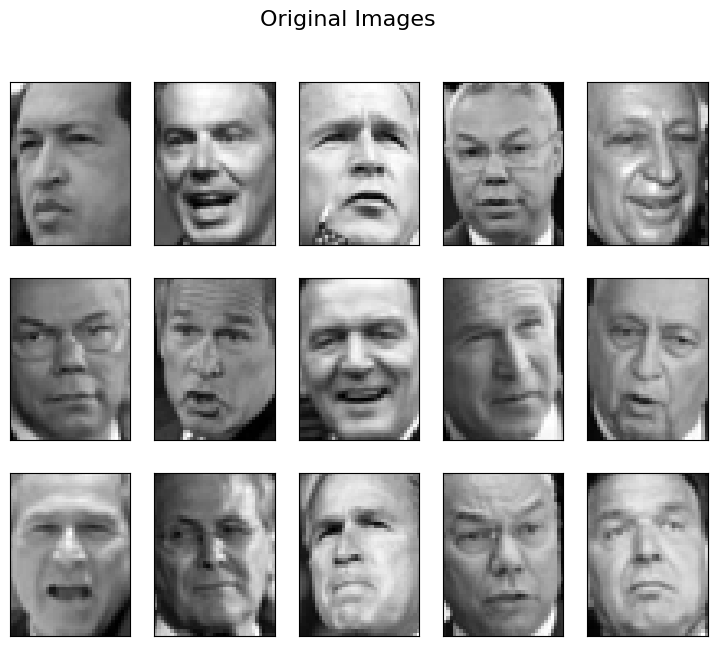

Visualizing PCA components...


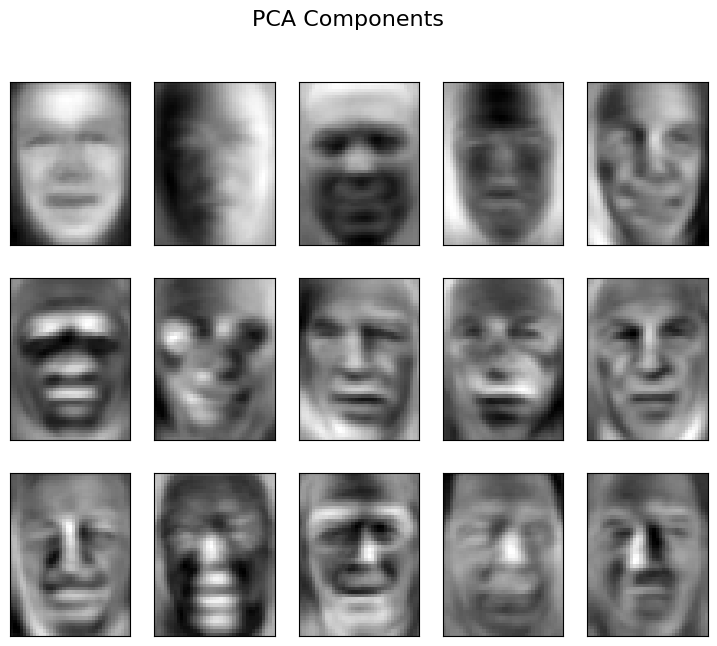

Visualizing personalized SSPCA components...


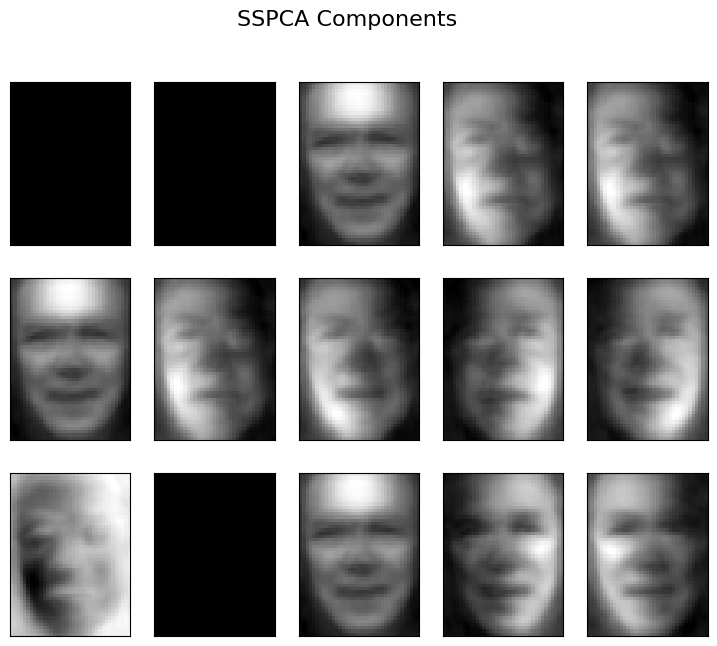

Visualizing Mini Batch SSPCA components...


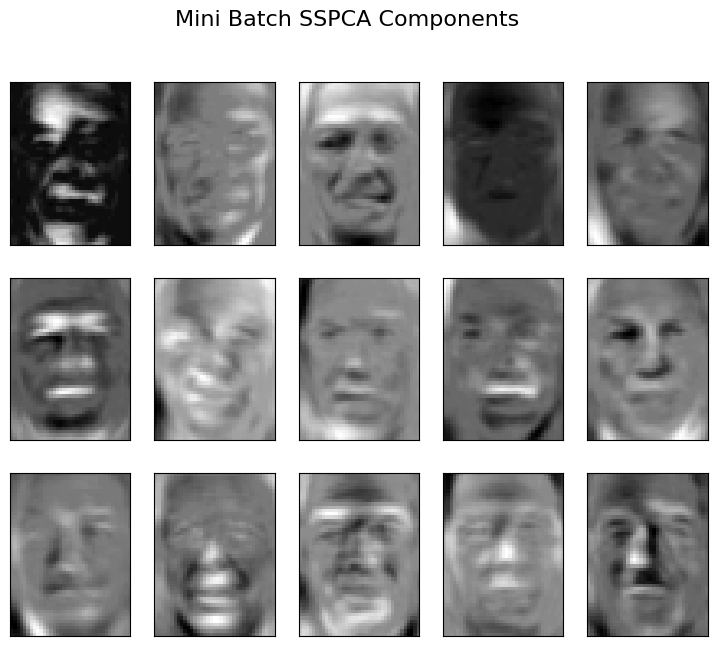

In [20]:
def plot_gallery(title, images, n_col=5, n_row=3, image_shape=(h, w)):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images[:n_col * n_row]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

print("Visualizing Original Images...")
plot_gallery("Original Images", X)

print("Visualizing PCA components...")
plot_gallery("PCA Components", pca_components, image_shape=(h, w))

print("Visualizing personalized SSPCA components...")
plot_gallery("SSPCA Components", sspca_components, image_shape=(h, w))

print("Visualizing Mini Batch SSPCA components...")
plot_gallery("Mini Batch SSPCA Components", mb_sspca_components, image_shape=(h, w))


### Reconstruction Error Comparison

In [21]:
X_pca_reconstructed = pca.inverse_transform(X_pca)
X_sspca_reconstructed = X_scaled @ sspca_components.T @ sspca_components
X_mb_sspca_reconstructed = X_scaled @ mb_sspca_components.T @ mb_sspca_components

pca_reconstruction_error = np.mean((X_scaled - X_pca_reconstructed) ** 2)
sspca_reconstruction_error = np.mean((X_scaled - X_sspca_reconstructed) ** 2)
mb_sspca_reconstruction_error = np.mean((X_scaled - X_mb_sspca_reconstructed) ** 2)

print(f"PCA Reconstruction Error: {pca_reconstruction_error:.4f}")
print(f"Personalized SSPCA Reconstruction Error: {sspca_reconstruction_error:.4f}")
print(f"Mini Batch SSPCA Reconstruction Error: {mb_sspca_reconstruction_error:.4f}")

PCA Reconstruction Error: 0.0496
Personalized SSPCA Reconstruction Error: 4115.5747
Mini Batch SSPCA Reconstruction Error: 5.0802
